# Event Duration by ISO/RTO

  iso/rto   min_dur   max_dur
0   CAISO  1.076923  4.588235
1   ERCOT       NaN  4.000000
2   ISONE  2.857143  4.428571
3    MISO  4.000000  4.750000
4   NYISO  4.000000       NaN
5     PJM  3.750000  6.285714
6     SPP  3.500000  6.222222
7   other  3.222222  6.250000


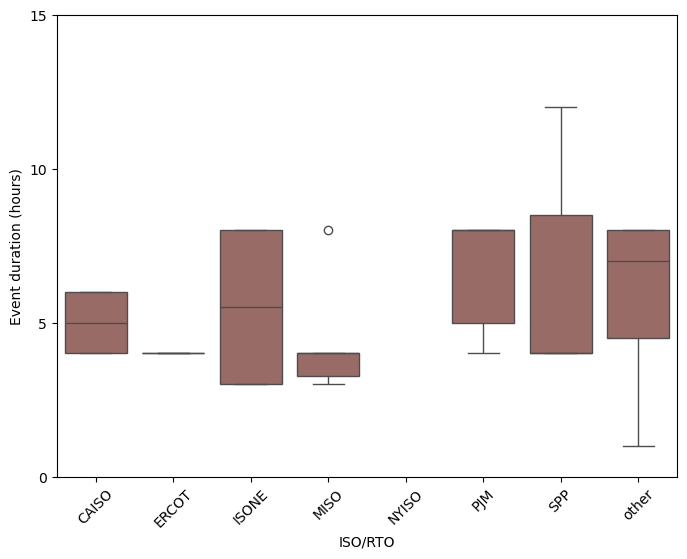

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'data/program_data/us_program_data.csv'))

# Group by iso/rto and calculate the necessary statistics
iso_rto_durations = data.groupby(['iso/rto'])[['min_dur', 'max_dur']].mean().reset_index()

# Display the iso/rto DataFrame
print(iso_rto_durations)

# Calculate the minimum and maximum durations per season for each iso/rto
durations = data.groupby(['iso/rto', 'season'])['max_dur'].agg(['min', 'max']).reset_index()

# Melt the DataFrame to long format for seaborn
durations_melted = durations.melt(id_vars=['iso/rto', 'season'], value_vars=['min', 'max'], var_name='duration_type', value_name='duration')

# replace the season such that the first letter is capitalized and replace _ with space
durations_melted['season'] = durations_melted['season'].str.capitalize().str.replace('_', ' ')

durations_melted

# Plot a box and whisker plot of the durations by iso/rto
fig, ax = plt.subplots(figsize=(8, 6))

my_palette = {'Summer': '#A1645E', 'Winter': '#5E9BA1', 'Year round': '#747474'}
sns.boxplot(x='iso/rto', y='duration', data=durations_melted, ax=ax, color=my_palette['Summer'])

# Update axis labels and ticks
ax.set(xlabel='ISO/RTO', ylabel='Event duration (hours)', yticks=np.arange(0, 17, 5))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()
